In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
patient = pd.read_csv("/content/sample_data/JK-Allopathic-Outpatient_attendance-May-2019.csv")
fifa = pd.read_csv("/content/sample_data/Fifa_player_football_data.csv")

In [3]:
patient.head(10)

,District,Facility Type,Total No. of Facilities #,No. of facilities reporting nil performance *,Performance - Overall Average **,Performance - Maximum,Performance - Minimum,No. of facilities by performance - 1 to 100,No. of facilities by performance - 101 to 500,No. of facilities by performance - 501 to 1000,No. of facilities by performance - >1000
0,Anantnag,DH,2,0,34828,41255,28402,0,0,0,2
1,Anantnag,CHC,5,0,10674,16209,5986,0,0,0,5
2,Anantnag,SC,154,10,42,300,2,137,7,0,0
3,Badgam,DH,1,0,23012,23012,23012,0,0,0,1
4,Badgam,CHC,9,0,9446,16828,4151,0,0,0,9
5,Badgam,SC,150,9,56,287,4,124,17,0,0
6,Bandipora,DH,1,0,17976,17976,17976,0,0,0,1
7,Bandipora,CHC,3,0,11201,21847,1311,0,0,0,3
8,Bandipora,SC,43,1,142,690,11,17,24,1,0
9,Baramula,DH,1,0,52143,52143,52143,0,0,0,1


In [4]:
df1 = patient.groupby(['District']).sum()
df1.drop(['Total No. of Facilities #','No. of facilities reporting nil performance *','Performance - Overall Average **','Performance - Maximum','Performance - Minimum'],axis=1,inplace=True)
df1

,No. of facilities by performance - 1 to 100,No. of facilities by performance - 101 to 500,No. of facilities by performance - 501 to 1000,No. of facilities by performance - >1000
District,,,,
Anantnag,137,7,0,7
Badgam,124,17,0,10
Bandipora,17,24,1,4
Baramula,86,79,0,9
Doda,10,90,0,4
Ganderbal,27,8,0,2
Jammu,48,135,3,10
Kargil,91,6,0,4
Kathua,71,119,1,7


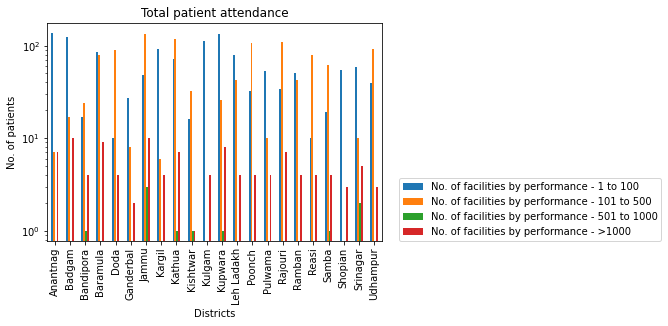

In [14]:
df1.plot(kind='bar', stacked=False)
plt.xlabel('Districts')
plt.ylabel('No. of patients')
plt.title('Total patient attendance')
plt.yscale('log')
plt.legend(loc=(1.05,0))

In [6]:
df2 = patient.groupby(['Facility Type']).sum()
df2

,Total No. of Facilities #,No. of facilities reporting nil performance *,Performance - Overall Average **,Performance - Maximum,Performance - Minimum,No. of facilities by performance - 1 to 100,No. of facilities by performance - 101 to 500,No. of facilities by performance - 501 to 1000,No. of facilities by performance - >1000
Facility Type,,,,,,,,,
CHC,87,1,201070,372009,95758,0,2,1,83
DH,24,0,560129,576450,543810,0,0,0,24
SC,2709,294,2360,14580,416,1306,1095,9,5


In [7]:
df2.drop(['Total No. of Facilities #','No. of facilities reporting nil performance *','Performance - Overall Average **','Performance - Maximum','Performance - Minimum'],axis=1,inplace=True)
df2

,No. of facilities by performance - 1 to 100,No. of facilities by performance - 101 to 500,No. of facilities by performance - 501 to 1000,No. of facilities by performance - >1000
Facility Type,,,,
CHC,0,2,1,83
DH,0,0,0,24
SC,1306,1095,9,5


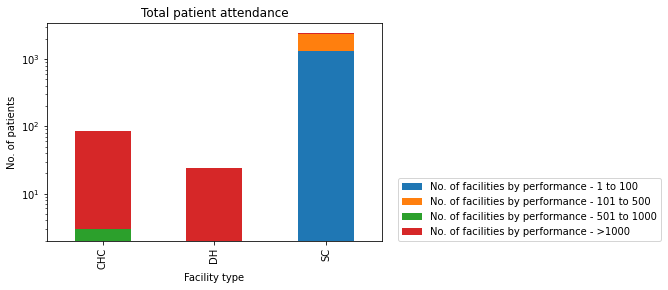

In [13]:
df2.plot(kind='bar', stacked=True)
plt.xlabel('Facility type')
plt.ylabel('No. of patients')
plt.title('Total patient attendance')
plt.yscale('log')
plt.legend(loc=(1.05,0))

In [9]:
df3 = patient[['District','Facility Type','Performance - Overall Average **']]
df3

,District,Facility Type,Performance - Overall Average **
0,Anantnag,DH,34828
1,Anantnag,CHC,10674
2,Anantnag,SC,42
3,Badgam,DH,23012
4,Badgam,CHC,9446
...,...,...,...
61,Srinagar,CHC,12879
62,Srinagar,SC,124
63,Udhampur,DH,29972
64,Udhampur,CHC,10604


In [10]:
df3 = df3.reset_index()
idx=df3["District"].isin(['Anantnag','Jammu','Poonch','Reasi','Udhampur'])
df3=df3[idx]
df3

,index,District,Facility Type,Performance - Overall Average **
0,0,Anantnag,DH,34828
1,1,Anantnag,CHC,10674
2,2,Anantnag,SC,42
18,18,Jammu,DH,25335
19,19,Jammu,CHC,7343
20,20,Jammu,SC,156
39,39,Poonch,DH,19780
40,40,Poonch,CHC,7963
41,41,Poonch,SC,145
51,51,Reasi,DH,9236


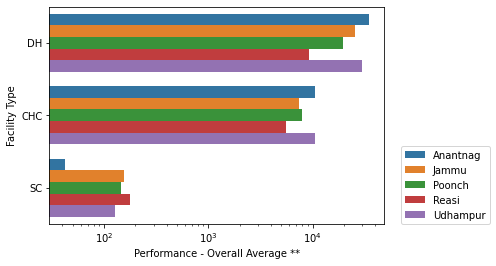

In [15]:
ax=sns.barplot(x="Performance - Overall Average **", y="Facility Type", hue="District", data=df3)
ax.set_xscale("log")
plt.legend(loc=(1.05,0))

In [12]:
df4=patient.groupby(["District","Facility Type"]).agg(count=("Performance - Maximum", 'sum'))
df4=df4.reset_index()
df4=df4.iloc[0:60]
print(df4)

      District Facility Type  count
0     Anantnag           CHC  16209
1     Anantnag            DH  41255
2     Anantnag            SC    300
3       Badgam           CHC  16828
4       Badgam            DH  23012
5       Badgam            SC    287
6    Bandipora           CHC  21847
7    Bandipora            DH  17976
8    Bandipora            SC    690
9     Baramula           CHC  31500
10    Baramula            DH  52143
11    Baramula            SC   2500
12        Doda           CHC   5997
13        Doda            DH  16286
14        Doda            SC    472
15   Ganderbal           CHC  21781
16   Ganderbal            DH  31323
17   Ganderbal            SC    293
18       Jammu           CHC  22694
19       Jammu            DH  35229
20       Jammu            SC    669
21      Kargil           CHC   1834
22      Kargil            DH   8363
23      Kargil            SC    185
24      Kathua           CHC   9365
25      Kathua            DH  27943
26      Kathua            SC

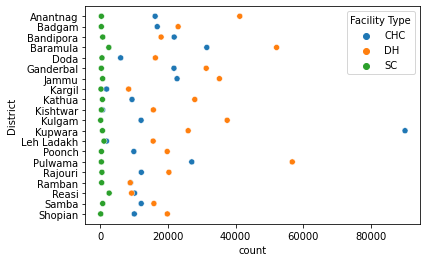

In [16]:
sns.scatterplot(data=df4, x="count", y="District", hue="Facility Type")

In [17]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [18]:
df5 = fifa[['Unnamed: 0','Name','Age']]
df5

,Unnamed: 0,Name,Age
0,0,L. Messi,31
1,1,Cristiano Ronaldo,33
2,2,Neymar Jr,26
3,3,De Gea,27
4,4,K. De Bruyne,27
...,...,...,...
18202,18202,J. Lundstram,19
18203,18203,N. Christoffersson,19
18204,18204,B. Worman,16
18205,18205,D. Walker-Rice,17


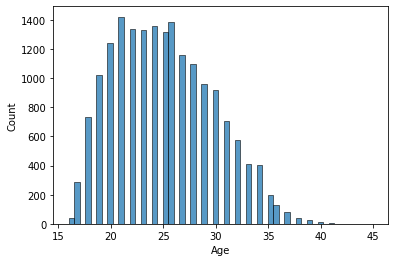

In [19]:
sns.histplot(data=df5, x="Age")

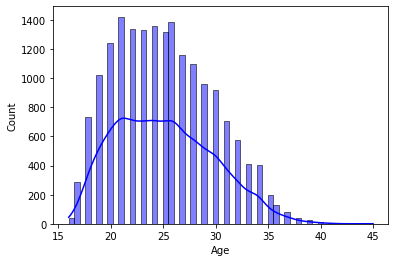

In [20]:
sns.histplot(data=df5, x="Age", kde=True, color="b")

In [21]:
df6 = fifa
idx=df6["Club"].isin(["FC Barcelona","Chelsea","Juventus","Real Madrid"])
df6=df6[idx]
df6

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,...,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€67M,€420K,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",NaN,2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,...,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€80M,€455K,2346,Right,5.0,4.0,3.0,High/ Medium,Normal,Yes,RS,9.0,"Jul 11, 2014",NaN,2021,6'0,190lbs,87+5,87+5,87+5,86+5,87+5,87+5,87+5,86+5,85+5,85+5,85+5,84+5,...,66+5,63+5,63+5,63+5,66+5,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14603,14603,245992,B. Gilmour,17,https://cdn.sofifa.org/players/4/19/245992.png,Scotland,https://cdn.sofifa.org/flags/42.png,61,84,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€550K,€7K,1613,Right,1.0,3.0,3.0,Medium/ Medium,Lean,No,CM,60.0,"Jul 1, 20

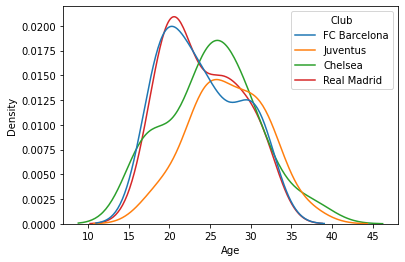

In [22]:
sns.kdeplot(data=df6, x="Age", hue="Club")

In [23]:
df7 = fifa[['Unnamed: 0','Name','Value','Preferred Foot']]
df7

,Unnamed: 0,Name,Value,Preferred Foot
0,0,L. Messi,€110.5M,Left
1,1,Cristiano Ronaldo,€77M,Right
2,2,Neymar Jr,€118.5M,Right
3,3,De Gea,€72M,Right
4,4,K. De Bruyne,€102M,Right
...,...,...,...,...
18202,18202,J. Lundstram,€60K,Right
18203,18203,N. Christoffersson,€60K,Right
18204,18204,B. Worman,€60K,Right
18205,18205,D. Walker-Rice,€60K,Right


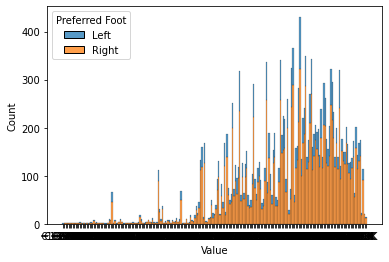

In [24]:
sns.histplot(data=df7, x="Value", hue="Preferred Foot", multiple="stack")

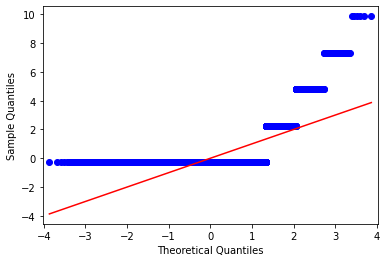

In [25]:
dt=(fifa["International Reputation"]-fifa["International Reputation"].mean())/fifa["International Reputation"].std()
dt = dt.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
#dt
qqplot(dt,line='s')
plt.show()